In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.metrics import mean_squared_error, confusion_matrix

In [6]:
# Load data
df = pd.read_csv("../data/processed/student_featured.csv")

# Load trained models
reg_model = joblib.load("../models/final_score_model.pkl")
cls_model = joblib.load("../models/risk_classifier.pkl")

In [7]:
features = [
    "attendance_percentage",
    "self_study_hours",
    "internal_marks_1",
    "internal_marks_2",
    "backlog_count",
    "performance_index",
    "consistency_score"
]

X = df[features]
y_reg = df["final_score"]
y_cls = df["risk_category"]

# Feature Importance

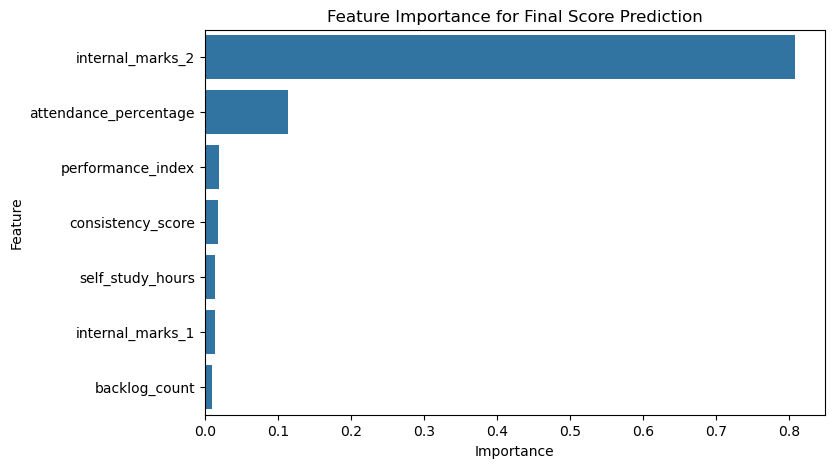

In [8]:
importances = pd.Series(
    reg_model["model"].feature_importances_,
    index=features
).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Feature Importance for Final Score Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Residual Analysis

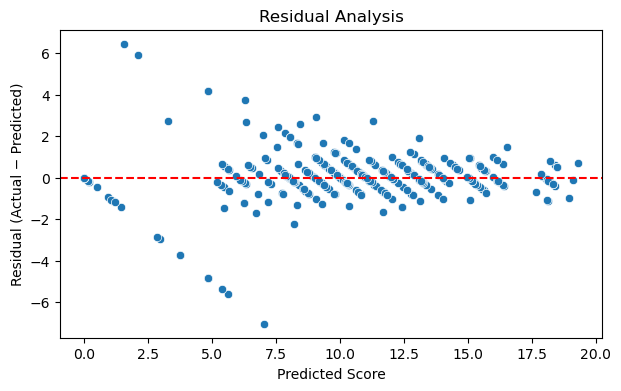

In [9]:
preds = reg_model.predict(X)
residuals = y_reg - preds

plt.figure(figsize=(7,4))
sns.scatterplot(x=preds, y=residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Score")
plt.ylabel("Residual (Actual − Predicted)")
plt.title("Residual Analysis")
plt.show()

# Error Distribution

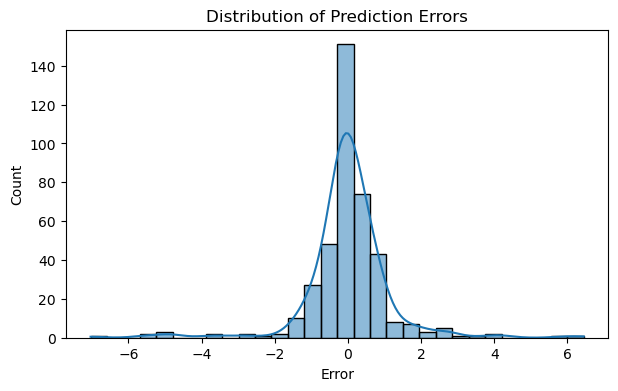

In [10]:
plt.figure(figsize=(7,4))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error")
plt.show()

In [11]:
rmse = mean_squared_error(y_reg, preds, squared=False)
rmse

C:\Users\Mansi Rajput\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


1.175758439461154

# Confusion Matrix

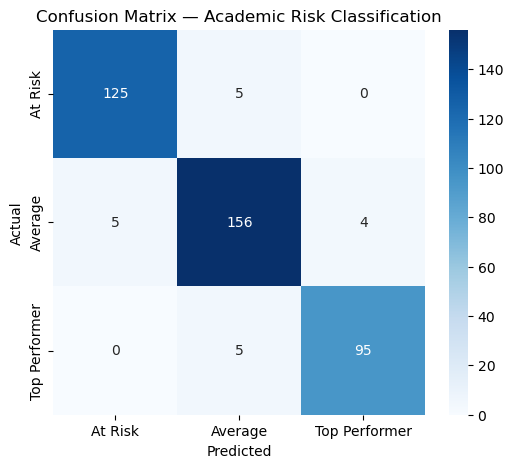

In [12]:
cls_preds = cls_model.predict(X)
cm = confusion_matrix(y_cls, cls_preds)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=cls_model.classes_,
            yticklabels=cls_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix — Academic Risk Classification")
plt.show()

# Classification Feature Importance

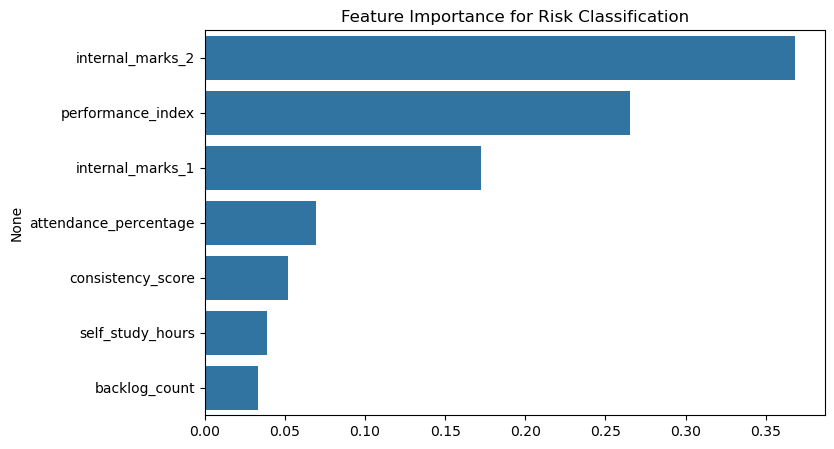

In [13]:
cls_importance = pd.Series(
    cls_model["model"].feature_importances_,
    index=features
).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=cls_importance.values, y=cls_importance.index)
plt.title("Feature Importance for Risk Classification")
plt.show()

# Risk vs Attendance Analysis

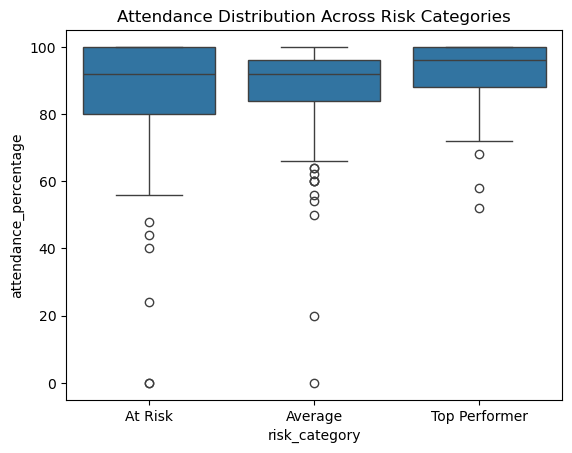

In [14]:
sns.boxplot(x="risk_category", y="attendance_percentage", data=df)
plt.title("Attendance Distribution Across Risk Categories")
plt.show()

# Risk vs Study Hours

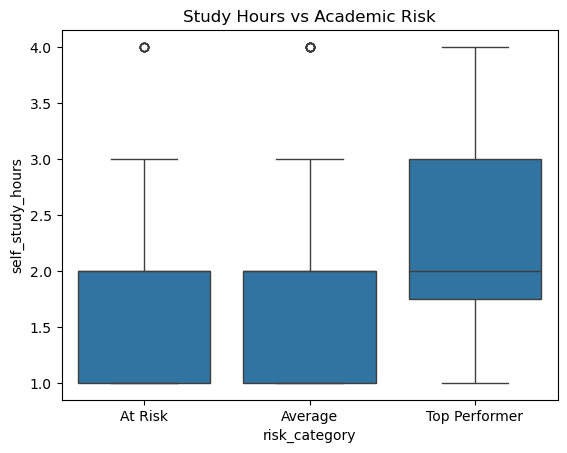

In [15]:
sns.boxplot(x="risk_category", y="self_study_hours", data=df)
plt.title("Study Hours vs Academic Risk")
plt.show()

In [16]:
high_risk_students = df[
    (df["attendance_percentage"] < 75) &
    (df["backlog_count"] > 0)
]

len(high_risk_students)

23

# Final Results Summary

In [17]:
summary = pd.DataFrame({
    "Aspect": [
        "Best Regression Model",
        "Regression Metric",
        "Best Classification Model",
        "Primary Risk Drivers"
    ],
    "Result": [
        "Random Forest (GridSearch Tuned)",
        f"RMSE = {rmse:.2f}",
        "Random Forest Classifier",
        "Attendance, Internal Marks, Consistency"
    ]
})

summary

,Aspect,Result
0,Best Regression Model,Random Forest (GridSearch Tuned)
1,Regression Metric,RMSE = 1.18
2,Best Classification Model,Random Forest Classifier
3,Primary Risk Drivers,"Attendance, Internal Marks, Consistency"
